In [33]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [34]:
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *

In [35]:
from planet import f2
from fastai.plots import *
metrics=[f2]
f_model = resnet34

In [36]:
PATH = '/home/ubuntu/fastai/courses/dl1/data/amazon/'
%cd '/home/ubuntu/fastai/courses/dl1/data/amazon/'


/home/ubuntu/data/amazon


In [37]:
label_csv = f'{PATH}train_v2.csv'
n = len(list(open(label_csv)))-1
val_idxs = get_cv_idxs(n)

In [38]:
def get_data(sz):
    tfms = tfms_from_model(f_model, sz, aug_tfms=transforms_top_down, max_zoom=1.05)
    return ImageClassifierData.from_csv(PATH, 'train-jpg', label_csv, tfms=tfms,
                    suffix='.jpg', val_idxs=val_idxs, test_name='test')

In [39]:
data = get_data(256)

In [40]:
x,y = next(iter(data.val_dl))

In [41]:
y[0]


 1
 0
 0
 0
 0
 1
 0
 0
 0
 0
 0
 0
 1
 0
 0
 1
 1
[torch.FloatTensor of size 17]

In [9]:
list(zip(data.classes, y[0]))

[('agriculture', 1.0),
 ('artisinal_mine', 0.0),
 ('bare_ground', 0.0),
 ('blooming', 0.0),
 ('blow_down', 0.0),
 ('clear', 1.0),
 ('cloudy', 0.0),
 ('conventional_mine', 0.0),
 ('cultivation', 0.0),
 ('habitation', 0.0),
 ('haze', 0.0),
 ('partly_cloudy', 0.0),
 ('primary', 1.0),
 ('road', 0.0),
 ('selective_logging', 0.0),
 ('slash_burn', 1.0),
 ('water', 1.0)]

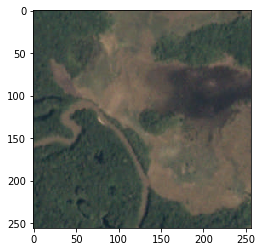

In [10]:
plt.imshow(data.val_ds.denorm(to_np(x))[0]*1.4);

In [11]:
sz=64

In [12]:
data = get_data(sz)

In [13]:
data = data.resize(int(sz*1.3), 'tmp')

A Jupyter Widget

In [14]:
learn = ConvLearner.pretrained(f_model, data, metrics=metrics)

A Jupyter Widget

[ 0.       0.22408  0.28186  0.82183]                        



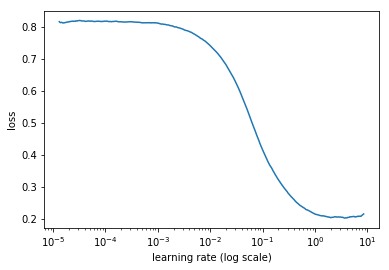

In [15]:
lrf=learn.lr_find()
learn.sched.plot()

In [16]:
lr = 0.2

In [17]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

A Jupyter Widget

[ 0.       0.14845  0.13203  0.88427]                        
[ 1.       0.13888  0.12658  0.89017]                        
[ 2.       0.14115  0.12572  0.89055]                        
[ 3.       0.13752  0.12439  0.89116]                        
[ 4.       0.13538  0.12329  0.89239]                        
[ 5.       0.13614  0.12172  0.8956 ]                        
[ 6.       0.12964  0.1209   0.89579]                        



In [18]:
lrs = np.array([lr/9,lr/3,lr])

In [19]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)

A Jupyter Widget

[ 0.       0.12405  0.10967  0.90706]                        
[ 1.       0.11436  0.10586  0.9094 ]                        
[ 2.       0.11056  0.10195  0.91336]                        
[ 3.       0.11306  0.10404  0.90915]                        
[ 4.       0.10696  0.09864  0.91695]                        
[ 5.       0.10344  0.09709  0.91755]                         
[ 6.       0.0963   0.09745  0.91771]                         



In [20]:
learn.save(f'{sz}')

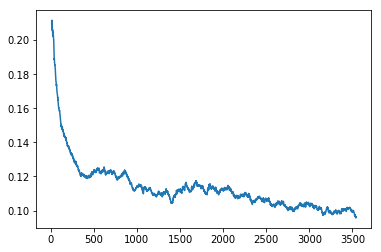

In [21]:
learn.sched.plot_loss()

In [22]:
sz=128

In [23]:
learn.set_data(get_data(sz))
learn.freeze()
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

A Jupyter Widget

[ 0.       0.10016  0.09507  0.91812]                         
[ 1.       0.09934  0.09405  0.91822]                         
[ 2.       0.09504  0.09186  0.92151]                         
[ 3.       0.09708  0.09124  0.92263]                         
[ 4.       0.09621  0.09039  0.92294]                         
[ 5.       0.09533  0.0909   0.92279]                         
[ 6.       0.09648  0.09048  0.92294]                         



In [24]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)
learn.save(f'{sz}')

A Jupyter Widget

[ 0.       0.09581  0.08525  0.92862]                         
[ 1.       0.09343  0.08496  0.92809]                         
[ 2.       0.09133  0.08359  0.92999]                         
[ 3.       0.09374  0.08592  0.92778]                         
[ 4.       0.08966  0.08358  0.9308 ]                         
[ 5.       0.08472  0.08309  0.93017]                         
[ 6.       0.08484  0.08275  0.93087]                         



In [25]:
sz=256

In [26]:
learn.set_data(get_data(sz))
learn.freeze()
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

A Jupyter Widget

[ 0.       0.08915  0.08803  0.92498]                         
[ 1.       0.08982  0.08738  0.92548]                         
[ 2.       0.09021  0.08638  0.92637]                         
[ 3.       0.09124  0.08675  0.92595]                         
[ 4.       0.08807  0.08541  0.92719]                         
[ 5.       0.089    0.08557  0.92652]                         
[ 6.       0.08858  0.08543  0.92694]                         



In [27]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)
learn.save(f'{sz}')

A Jupyter Widget

[ 0.       0.08887  0.08086  0.93293]                         
[ 1.       0.08672  0.08183  0.93168]                         
[ 2.       0.08317  0.08003  0.93409]                         
[ 3.       0.08951  0.08093  0.93352]                         
[ 4.       0.08187  0.08085  0.93294]                         
[ 5.       0.07919  0.07941  0.93453]                         
[ 6.       0.07754  0.07997  0.93414]                         



In [28]:
tta = learn.TTA()

In [29]:
f2(*tta)

0.93507988765968408

In [30]:
print("done")

done


In [31]:
prob_preds, y= learn.TTA(is_test=True)
classes = np.array(data.classes, dtype=str)
res = [" ".join(classes[np.where(pp > 0.5)]) for pp in prob_preds] 
test_fnames = [os.path.basename(f).split(".")[0] for f in data.test_ds.fnames]
test_df = pd.DataFrame(res, index=test_fnames, columns=['tags'])
test_df.to_csv('amazon_3.csv', index_label='image_name')

In [32]:
print("j'ai fini")

j'ai fini
